# Homework 8

### November 4, 2020

##### (1) Generate 100 examples of a two-group study for both the case where there is a .6 effect size.  Use 24 subjects per group and assume a normal distribution.  Count how many significant results there are. How many should you expect?   Now do a Bonferroni correction and an FDR correction and see how many significant cases there are. 

In [147]:
numreps = 100
subjs_per_group = 24
cohen_d = 0.6

group = c(rep(1,24),rep(2,24))
group = as.factor(group)
dv = rep(0,48)

ps = c(rep(0, numreps))
sig = 0
bonferroni = 0
fdr = 0

for (rep in 1:numreps){
    # sample 24 times from normal distribution with mean 0 and std 1
    x = sort(rnorm(24, 0, 1))
    # sample 24 times from normal distribution with mean 0.6 and std 1 to get effect size 0.6
    y = sort(rnorm(24, cohen_d, 1))

    dv[1:24] = x
    dv[25:48] = y
    
    p_val = t.test(dv~group)$p.value
    ps[rep] = p_val
    if (p_val < 0.05) {sig = sig + 1}

}

bonferroni = p.adjust(ps, method = 'bonferroni', n = numreps)
fdr = p.adjust(ps, method = 'fdr', n = numreps)

bonferroni_sig = length(bonferroni[bonferroni < 0.05])
fdr_sig = length(fdr[fdr < 0.05])

print(sig)
print(bonferroni_sig)
print(fdr_sig)

[1] 54
[1] 8
[1] 45


When I generate these 2 groups and run a 2-sample t-test 100 times, the unadjusted p-values are significant 60 times out of 100. This makes sense because the actual effect size between the 2 groups is 0.6. If there were no difference between the groups, I would expect this number to be 5 with an alpha level of 0.05 (I ran this simulation and got this result as well). After performing a bonferroni correction, the number of significant results drops to only 11 because of the much more stringent criteria. The fdr method, which is less stringent than the FWER but more stringent than an uncorrected result should be somewhere in the middle. This is the case, and I find 50 significant results with the fdr correction.

##### (2) 2.	The tenured women at a smallish state university sued the university claiming that they were being paid less than the men.  The salaries of every single tenured professor are in the file “salaries.csv” along with age, years of experience and department.  Make the best case for the women from the data and the best case for the university.

In [93]:
sal = read.csv('data_files//salary.csv')

In [94]:
head(sal)

salary,gender,departm,years,age
86285,1,bio,26,64
77125,1,bio,28,58
71922,1,bio,10,38
70499,1,bio,16,46
66624,1,bio,11,41
64451,1,bio,23,60


In [95]:
dim(sal)

[1] 77  5

In [96]:
sal$years = scale(sal$years)
sal$age = scale(sal$age)
sal$gender = as.factor(sal$gender)
sal$departm = as.factor(sal$departm)

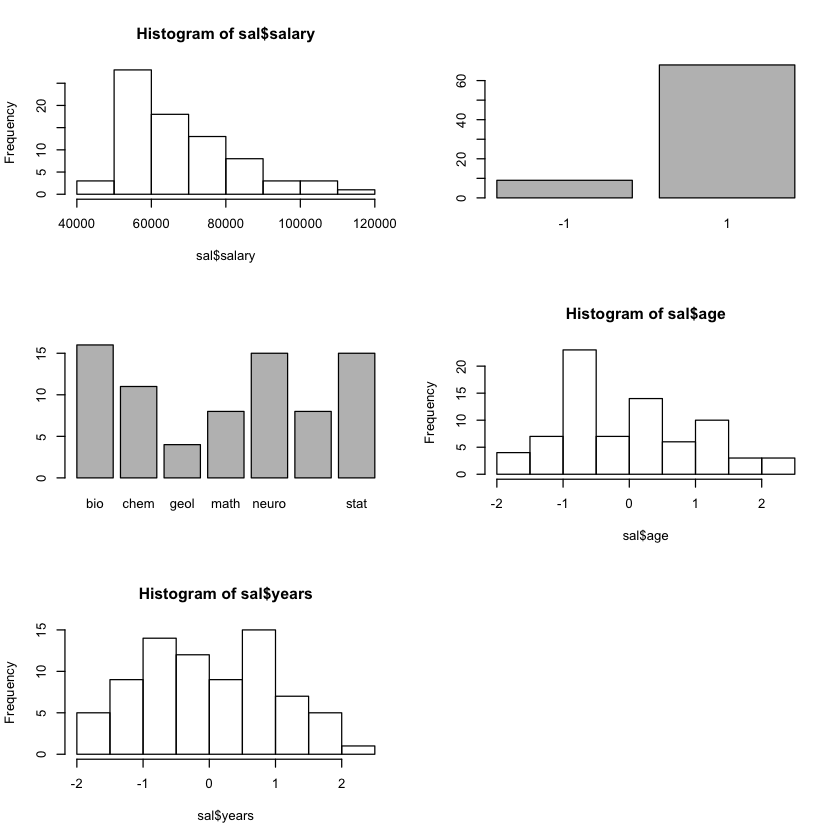

In [102]:
# take a look at univariate distributions
par(mfrow=c(3,2))
hist(sal$salary)
plot(sal$gender)
plot(sal$departm)
hist(sal$age)
hist(sal$years)

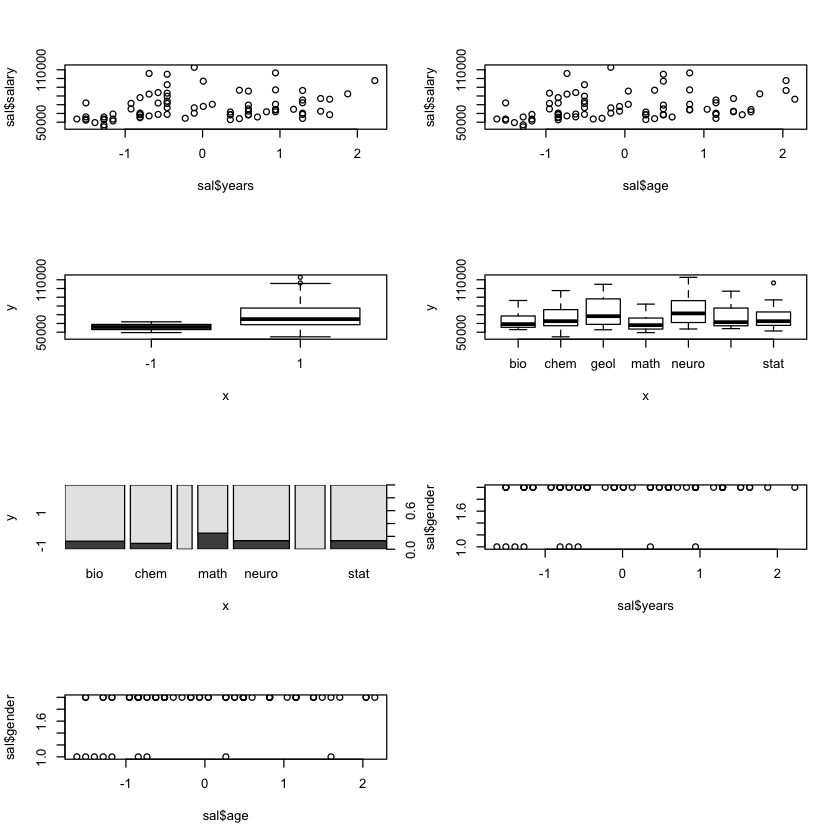

In [111]:
# take a look at basic correlations btwn variables and possible interactions
par(mfrow=c(4,2))
plot(sal$years, sal$salary)
plot(sal$age, sal$salary)
plot(sal$gender, sal$salary)
plot(sal$departm, sal$salary)
plot(sal$departm, sal$gender)
plot(sal$years, sal$gender)
plot(sal$age, sal$gender)

It appears there may be some interaction between gender and department, age, and years. I will add these in future models to make sure they are controlled for.

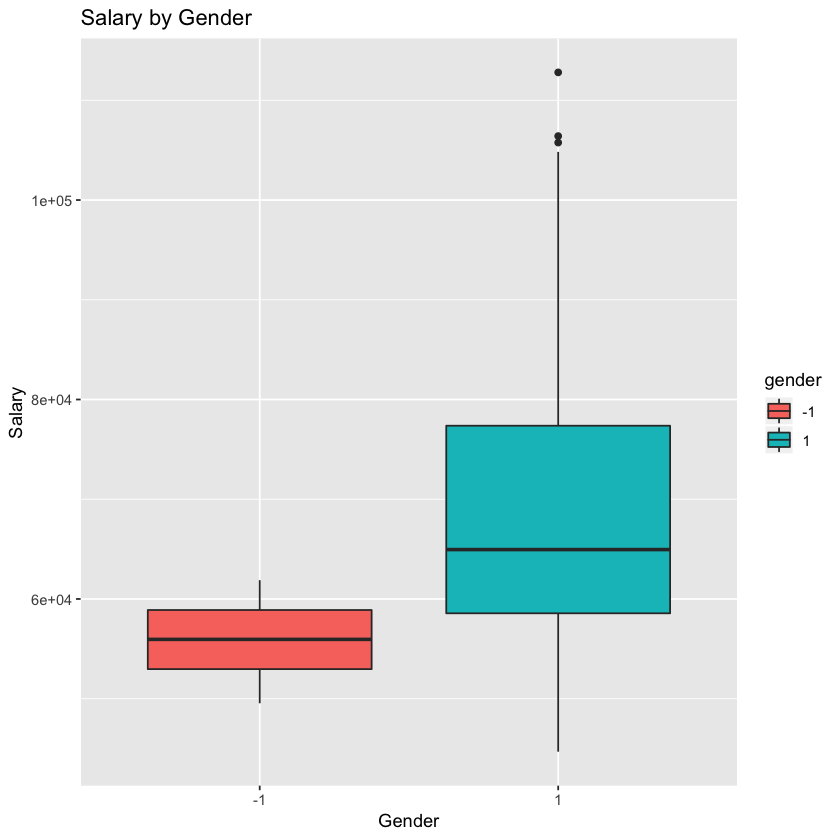

In [107]:
library(ggplot2)
qplot(gender, salary, data=sal, geom=c("boxplot"),
   fill=gender, main="Salary by Gender",
   xlab="Gender", ylab="Salary")

In [108]:
#t-test of the 2 means (men and women), not controlling for edlevel and age
t.test(salary ~ gender, sal)


	Welch Two Sample t-test

data:  salary by gender
t = -5.9879, df = 48.822, p-value = 2.473e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18192.615  -9049.199
sample estimates:
mean in group -1  mean in group 1 
        55719.67         69340.57 


The t-test of salaries between men and women is very significantly different (p <0.00001). This is likely the best case for women that there is a difference in pay between the genders. I will now add in more variables to control for and see if gender remains a significant predictor of salary.

In [119]:
summary(lm(salary~gender+departm+age+years, data=sal))


Call:
lm(formula = salary ~ gender + departm + age + years, data = sal)

Residuals:
   Min     1Q Median     3Q    Max 
-19855  -9715  -2759   6886  34534 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     54466.6     5586.7   9.749 1.78e-14 ***
gender1          8860.6     5101.1   1.737  0.08698 .  
departmchem       975.4     5480.7   0.178  0.85928    
departmgeol     12205.9     7831.8   1.559  0.12382    
departmmath      1127.7     5938.3   0.190  0.84996    
departmneuro    16947.8     5097.0   3.325  0.00144 ** 
departmphysics   3807.2     5981.0   0.637  0.52659    
departmstat      4462.4     4932.6   0.905  0.36887    
age              6294.4     5626.2   1.119  0.26724    
years           -1138.8     5711.6  -0.199  0.84257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13540 on 67 degrees of freedom
Multiple R-squared:  0.2913,	Adjusted R-squared:  0.1961 
F-statistic:  3.06 on 9 and 67

Once all prediction variables are entered into a linear model to predict salary, it seems that actually the department is the only significant predictor, and gender is no longer significant. This is likely the best argument for the university -- as we saw above, there are not an equal number of men and women in all departments, and all departments do not have the same average salary. This discrepancies are likely the reason that on the whole it appears men and women make different amounts. However, when these variables are controlled for, only department is a significant predictor of salary, not gender.